# Sazonalidade

**Objetivo do projeto**: Utilizar a abordagem de "hierarchical forecasting" para projetar múltiplas séries temporais

## 0. Setup

In [1]:
%load_ext autotime

time: 103 µs (started: 2023-12-28 16:30:03 -03:00)


In [2]:
#---- Manipulação de dados:

import pandas as pd
import numpy as np

#---- Visualização de dados:

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt

time: 829 ms (started: 2023-12-28 16:30:03 -03:00)


## 1. Dados: vendas de roupas no varejo

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/aws-samples/amazon-sagemaker-hierarchical-forecasting/main/retail-usa-clothing.csv')

dados.head()

,date,state,item,quantity,region,country
0,1997-11-25,NewYork,mens_clothing,8,Mid-Alantic,USA
1,1997-11-26,NewYork,mens_clothing,9,Mid-Alantic,USA
2,1997-11-27,NewYork,mens_clothing,11,Mid-Alantic,USA
3,1997-11-28,NewYork,mens_clothing,11,Mid-Alantic,USA
4,1997-11-29,NewYork,mens_clothing,10,Mid-Alantic,USA


time: 1.21 s (started: 2023-12-28 16:30:03 -03:00)


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388024 entries, 0 to 388023
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      388024 non-null  object
 1   state     388024 non-null  object
 2   item      388024 non-null  object
 3   quantity  388024 non-null  int64 
 4   region    388024 non-null  object
 5   country   388024 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.8+ MB
time: 84.3 ms (started: 2023-12-28 16:30:05 -03:00)


## 2. Correção nos dados

In [5]:
#---- Criando uma cópia dos dados

df = dados\
    .copy()

time: 12.1 ms (started: 2023-12-28 16:30:05 -03:00)


In [6]:
#---- Transformando para datetime a variável "date"

df['date'] = pd.to_datetime(df['date'])

df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 388024 entries, 0 to 388023
Series name: date
Non-Null Count   Dtype         
--------------   -----         
388024 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 MB
time: 91.2 ms (started: 2023-12-28 16:30:05 -03:00)


In [69]:
#---- Extraindo as features da variável de data:

df['dia_da_semana'] = df['date'].dt.day_name()  # Dia da semana
df['dia_do_ano'] = df['date'].dt.dayofyear  # Dia do ano
df['dia_do_mes'] = df['date'].dt.day  # Dia do mês
df['mes'] = df['date'].dt.month  # Mês
df['ano'] = df['date'].dt.year  # Ano

time: 141 ms (started: 2023-12-28 17:04:12 -03:00)


In [73]:
#---- Filtro para trazer somente os dados do ano mais recente (2008 e 2009)

df = df\
    .query('ano.isin([2008, 2009])')

time: 14.9 ms (started: 2023-12-28 17:06:41 -03:00)


## 2. Sazonalidade do dia da semana por variável

In [84]:
df\
    .groupby('dia_da_semana', as_index = False)['quantity']\
    .sum()

,dia_da_semana,quantity
0,Friday,525458
1,Monday,525446
2,Saturday,525285
3,Sunday,525470
4,Thursday,525466
5,Tuesday,531959
6,Wednesday,525301


time: 13.1 ms (started: 2023-12-28 17:18:11 -03:00)


### 2.1. Estado

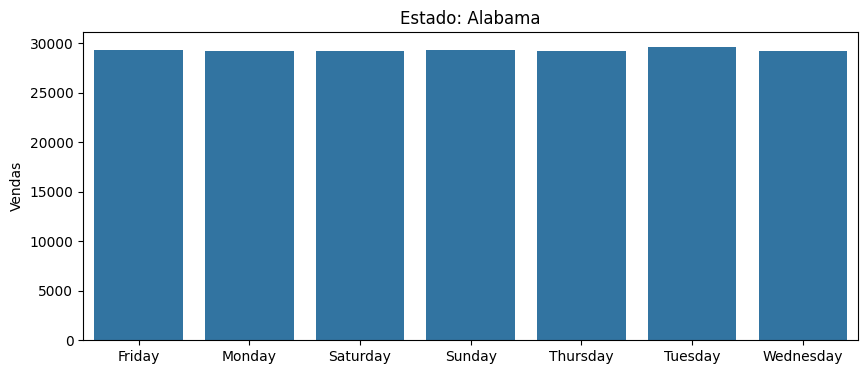

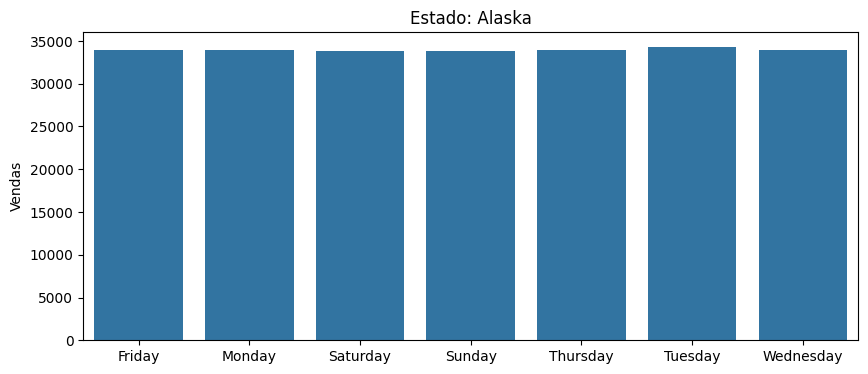

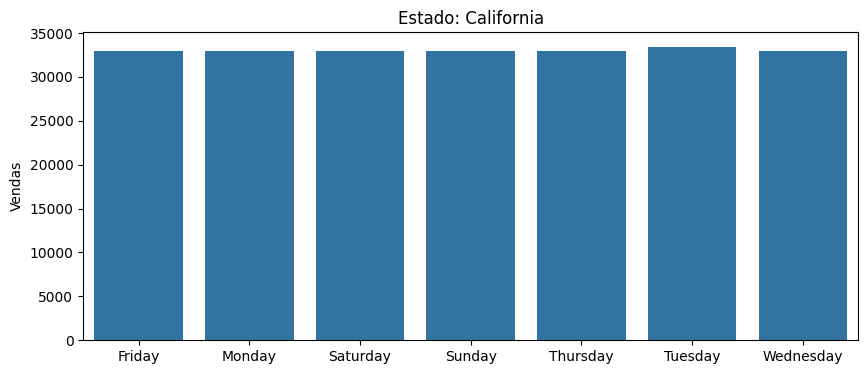

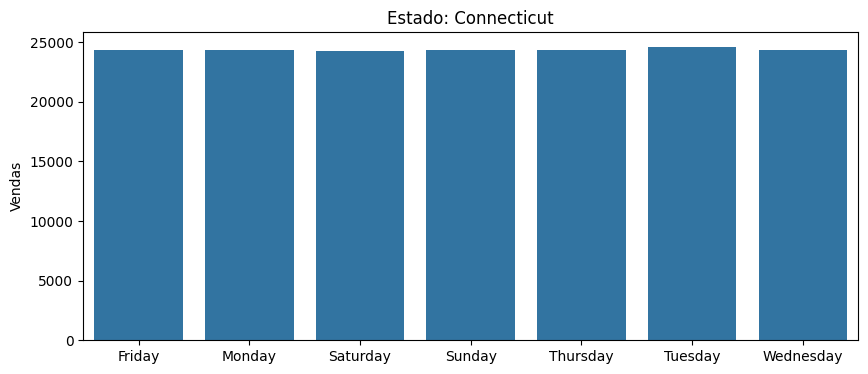

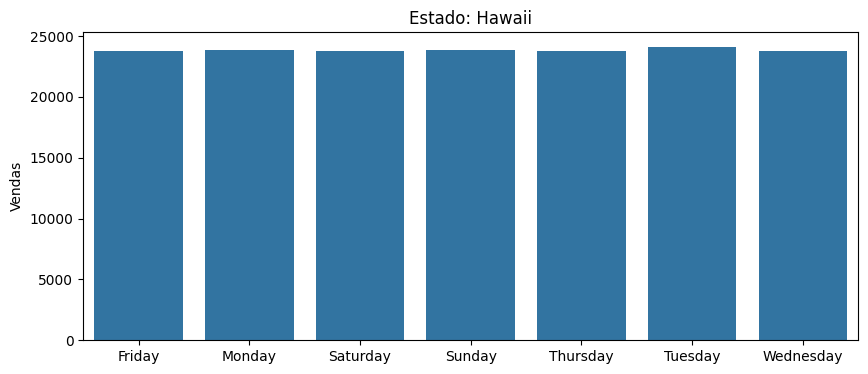

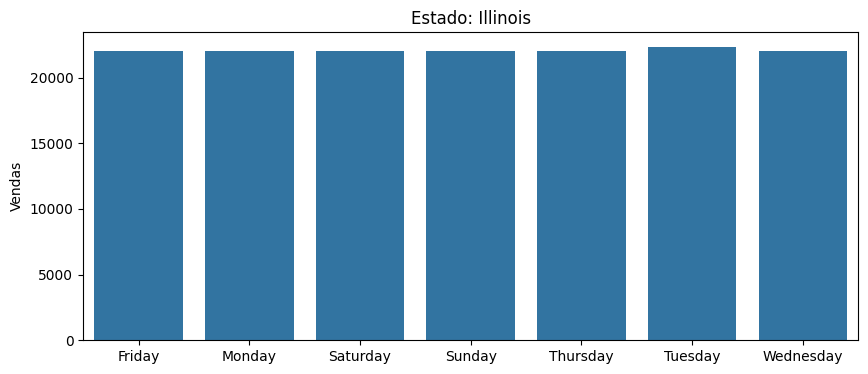

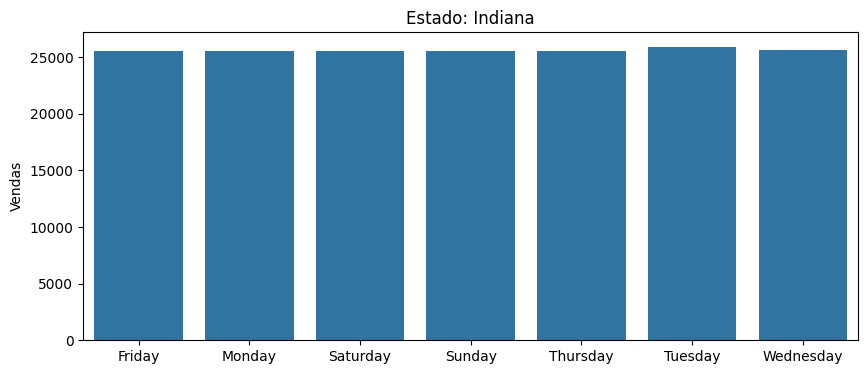

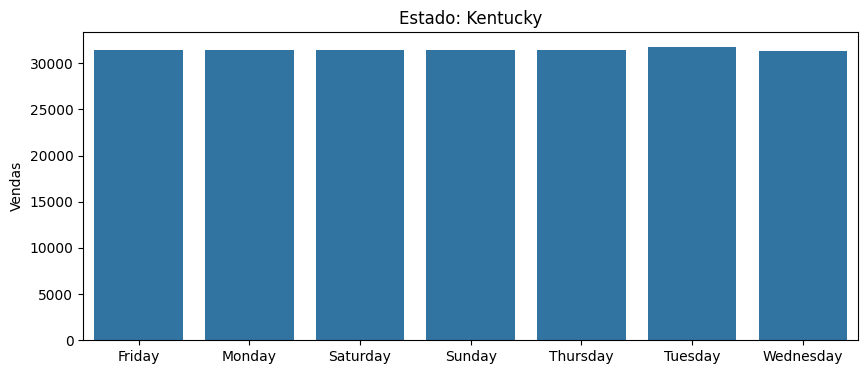

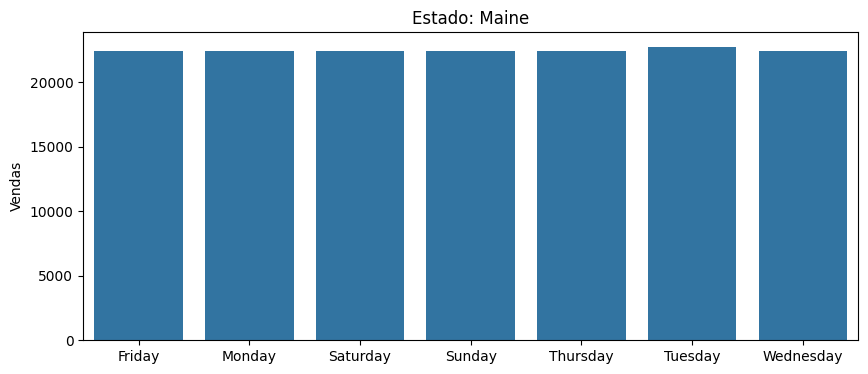

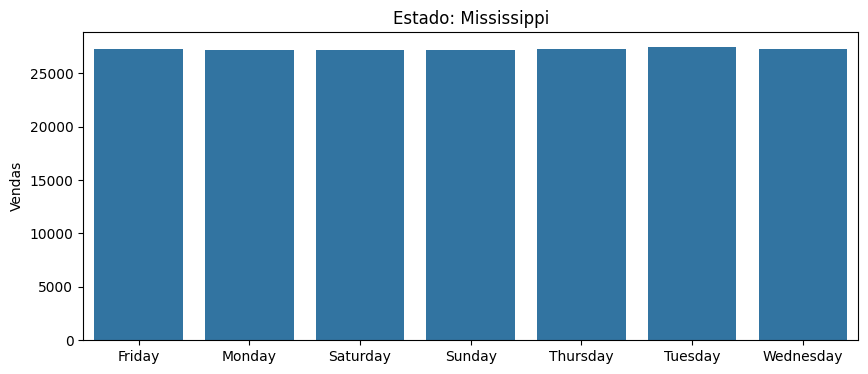

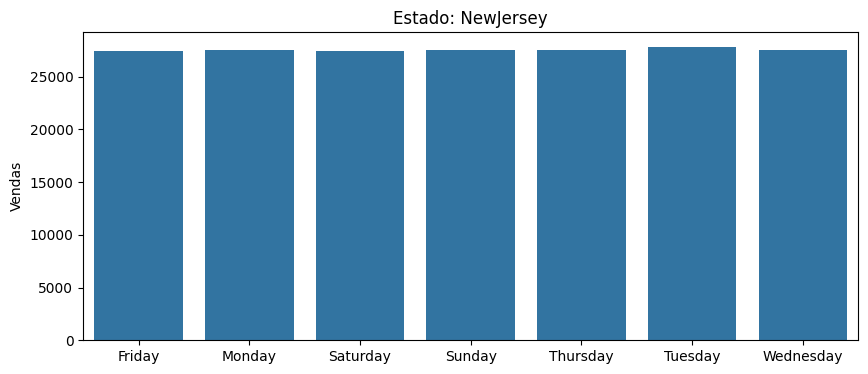

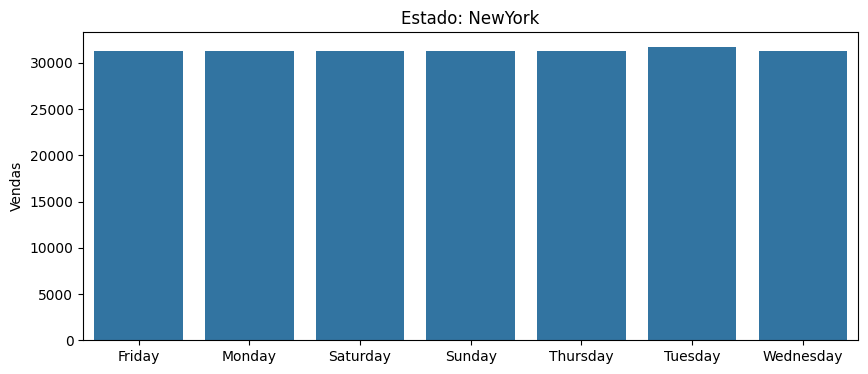

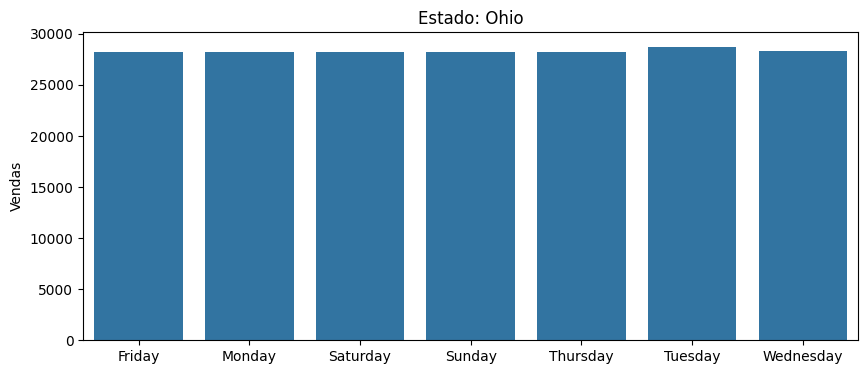

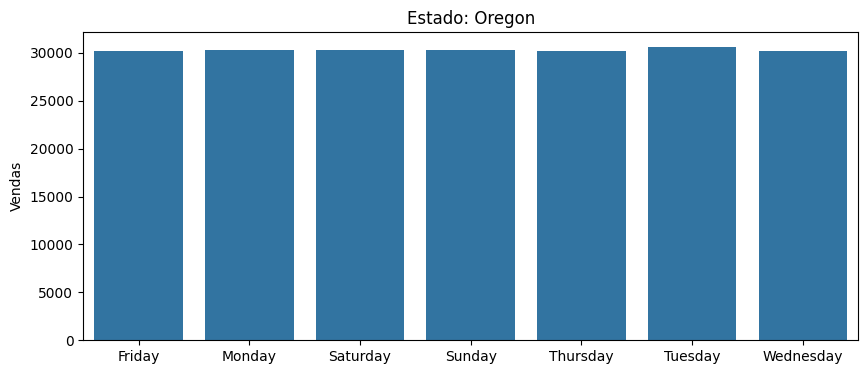

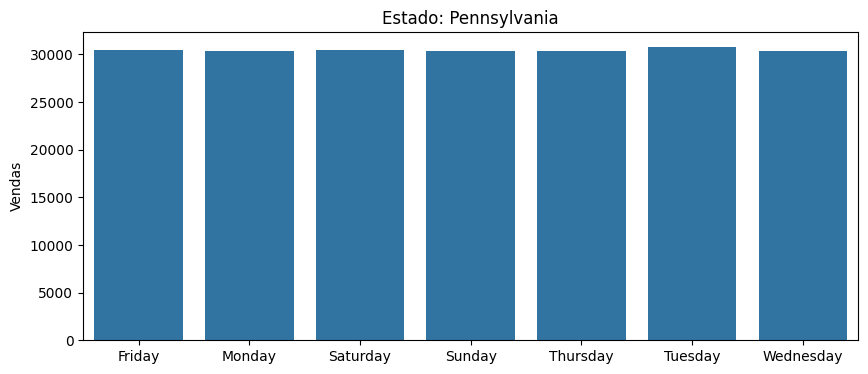

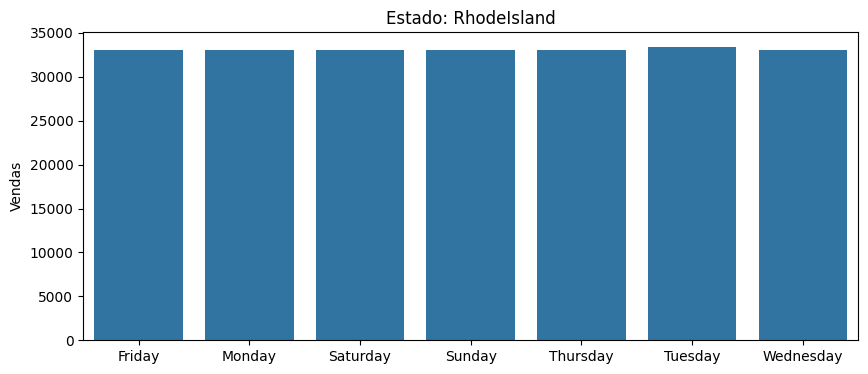

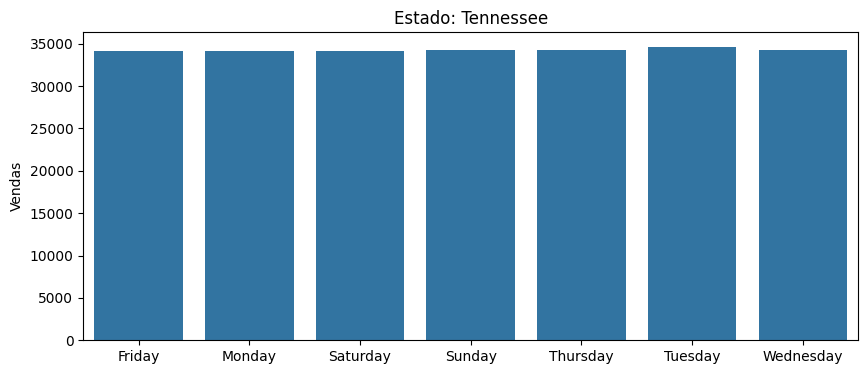

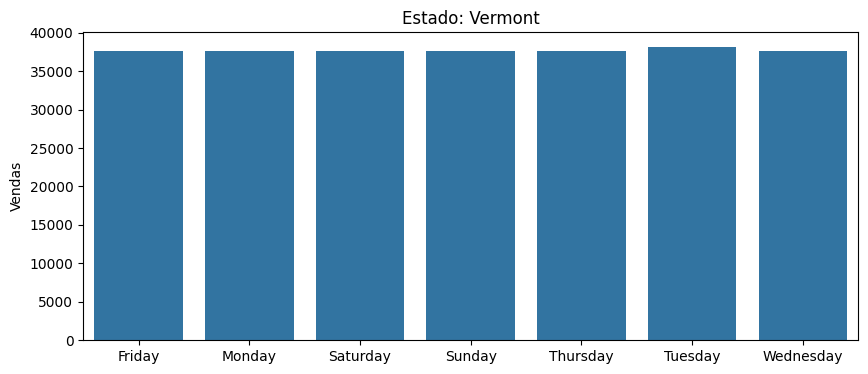

time: 3.62 s (started: 2023-12-28 17:10:25 -03:00)


In [80]:
#---- Dataset:

df_estado_dia_semana = df\
    .groupby(['dia_da_semana', 'state'], as_index = False)['quantity']\
    .sum()

#---- Gráfico:

for state in df_estado_dia_semana.state.unique():

    df_temp = df_estado_dia_semana\
        .query(f'state == "{state}"')

    plt.figure(figsize = (10, 4))
    
    _ = sns.barplot(data = df_temp, x = 'dia_da_semana', y = 'quantity')
    _ = _.set_title(f'Estado: {state}')
    _ = plt.ylabel('Vendas')
    _ = plt.xlabel('')

### 2.2. Item

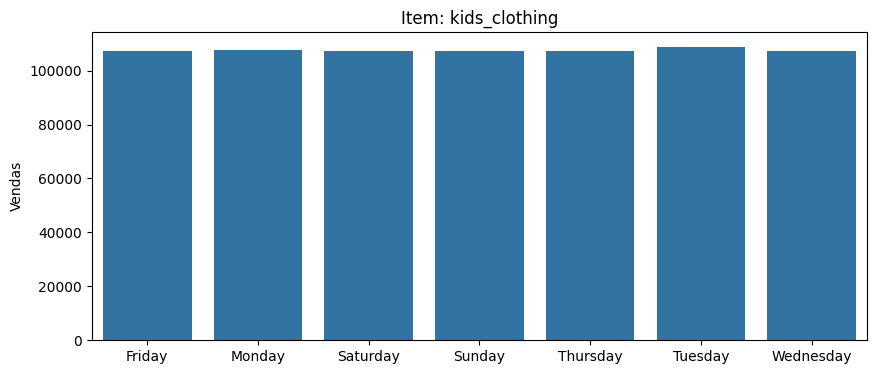

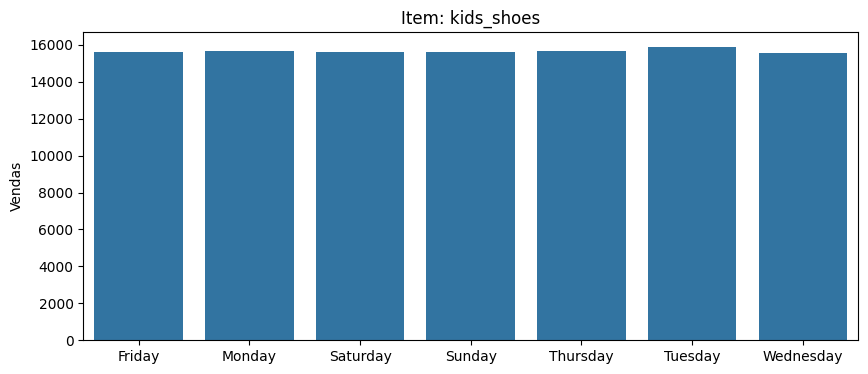

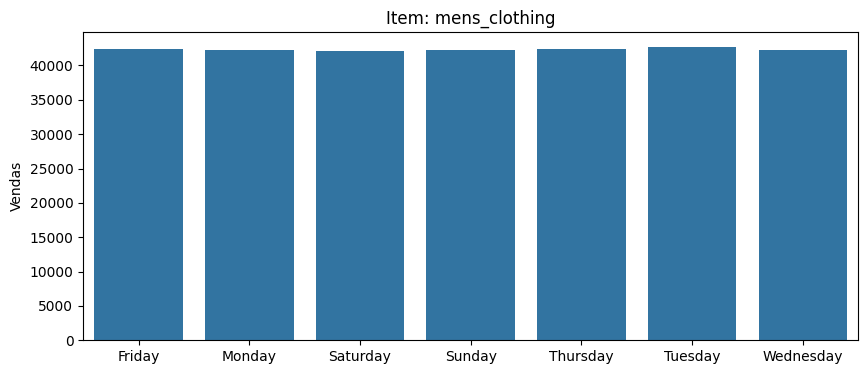

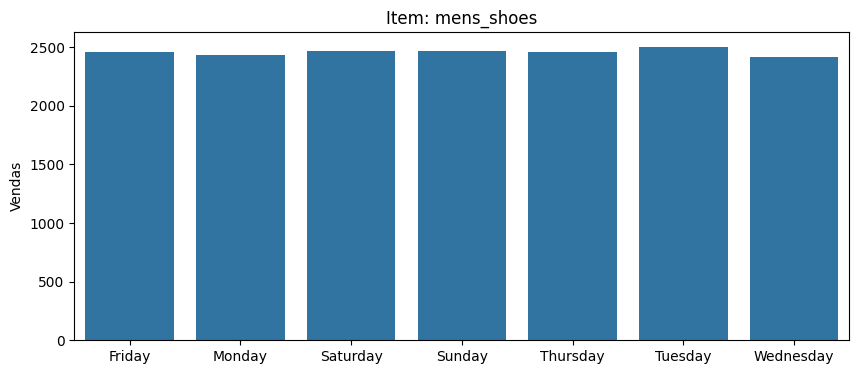

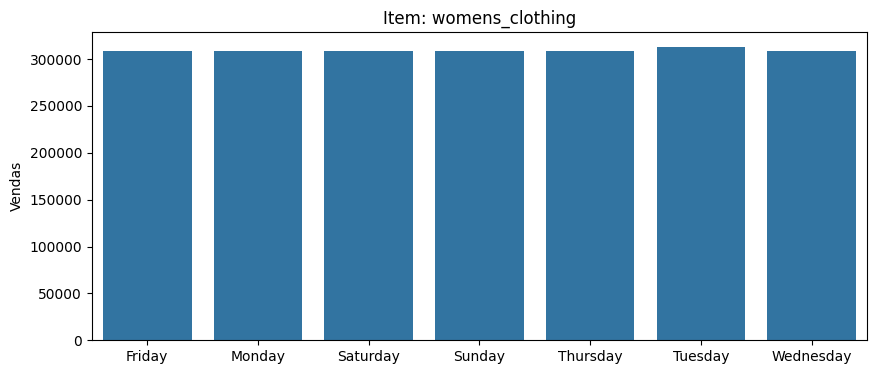

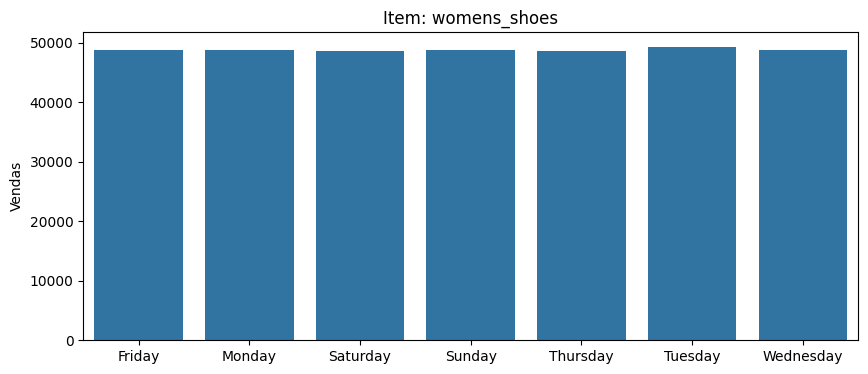

time: 1.25 s (started: 2023-12-28 17:12:21 -03:00)


In [83]:
#---- Dataset:

df_item_dia_semana = df\
    .groupby(['dia_da_semana', 'item'], as_index = False)['quantity']\
    .sum()

#---- Gráfico:

for item in df_item_dia_semana.item.unique():

    df_temp = df_item_dia_semana\
        .query(f'item == "{item}"')

    plt.figure(figsize = (10, 4))
    
    _ = sns.barplot(data = df_temp, x = 'dia_da_semana', y = 'quantity')
    _ = _.set_title(f'Item: {item}')
    _ = plt.ylabel('Vendas')
    _ = plt.xlabel('')